In [20]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
file_path = '../data/national-data-master.csv'
data = pd.read_csv(file_path)
train_file_path = '../data/data-full-train.csv' 
data_train = pd.read_csv(train_file_path)

We start with some null value checks on the full dataset:

In [22]:
data.head()

,FIPS,State,County,Deaths,Years of Potential Life Lost Rate,% Fair or Poor Health,Average Number of Physically Unhealthy Days,Average Number of Mentally Unhealthy Days,% Low Birthweight,% Adults Reporting Currently Smoking,...,% 65 and Over,% Black,% American Indian or Alaska Native,% Asian,% Native Hawaiian or Other Pacific Islander,% Hispanic,% Non-Hispanic White,% Not Proficient in English,% Female,% Rural
0,1000,Alabama,NaN,98140.0,11415.734833,17.8,3.934735,5.869320,10.480008,17.9,...,18.026796,26.430898,0.715863,1.588693,0.109493,4.931778,64.711716,1.047498,51.375324,42.262760
1,1001,Alabama,Autauga,942.0,9407.948438,17.3,3.910265,5.703204,9.871335,16.9,...,16.410917,21.011061,0.471895,1.178065,0.122157,3.381917,72.051072,0.366486,51.296039,40.676813
2,1003,Alabama,Baldwin,3789.0,8981.575353,15.2,3.730943,5.373666,8.124318,15.0,...,21.928703,8.224887,0.810761,1.156086,0.066549,5.036216,82.978473,0.786658,51.239069,37.586455
3,1005,Alabama,Barbour,579.0,13138.848362,27.3,5.023488,6.014294,12.272491,25.0,...,20.622521,47.195013,0.724520,0.469522,0.279284,5.099976,45.272403,1.980660,47.122157,65.919994
4,1007,Alabama,Bibb,501.0,12675.434581,22.0,4.552795,5.824583,9.828571,22.0,...,17.805044,20.736196,0.572597,0.290843,0.131788,3.176551,73.996819,0.289182,46.489434,100.000000


In [23]:
data.describe()

,FIPS,Deaths,Years of Potential Life Lost Rate,% Fair or Poor Health,Average Number of Physically Unhealthy Days,Average Number of Mentally Unhealthy Days,% Low Birthweight,% Adults Reporting Currently Smoking,% Adults with Obesity,Food Environment Index,...,% 65 and Over,% Black,% American Indian or Alaska Native,% Asian,% Native Hawaiian or Other Pacific Islander,% Hispanic,% Non-Hispanic White,% Not Proficient in English,% Female,% Rural
count,3201.000000,2937.000000,2937.000000,3194.000000,3194.000000,3194.000000,3096.000000,3194.000000,3194.000000,3159.000000,...,3194.000000,3194.000000,3194.000000,3194.000000,3194.000000,3194.000000,3194.000000,3194.000000,3194.000000,3194.000000
mean,30319.639488,3084.906367,9927.126729,17.680964,3.887762,5.212354,8.363311,18.979869,37.292642,7.542703,...,20.456572,9.036009,2.449764,1.753214,0.170412,10.449768,74.682870,1.601778,49.514804,63.486567
std,15209.064290,16883.777093,3434.598181,4.536947,0.648025,0.613844,2.081590,4.110126,4.576466,1.199885,...,4.849011,14.065240,7.638185,3.179527,0.913363,13.994709,20.256412,2.627180,2.331240,33.708551
min,1000.000000,48.000000,2771.454704,8.400000,2.261790,3.185544,3.053435,7.000000,17.400000,0.000000,...,5.442794,0.000000,0.000000,0.000000,0.000000,0.662915,2.693887,0.000000,21.568627,0.000000
25%,18165.000000,263.000000,7566.637341,14.200000,3.385923,4.814033,6.949073,16.400000,35.000000,6.900000,...,17.336744,0.851490,0.444120,0.545037,0.041263,2.862621,62.873092,0.263275,48.994919,34.778184
50%,29171.000000,560.000000,9429.474414,16.800000,3.866092,5.229221,8.073939,18.700000,37.600000,7.700000,...,20.077162,2.384093,0.741540,0.836376,0.078325,5.157676,81.728687,0.716390,49.884054,65.731561
75%,45075.000000,1382.000000,11735.843802,20.700000,4.332715,5.626761,9.296569,21.500000,40.200000,8.400000,...,23.042826,10.255192,1.479426,1.634624,0.144374,11.186338,91.206706,1.756032,50.650202,100.000000
max,56045.000000,420722.000000,41152.261127,38.000000,6.836834,7.388805,19.178082,43.000000,52.500000,10.000000,...,57.454646,85.144804,92.111621,46.380224,43.902439,96.064082,97.585769,36.363636,57.762420,100.000000


In [24]:
target = '% Adults with Diabetes'

#target = 'Drug Overdose Mortality Rate'

In [25]:
dem_features_full = ['% Completed High School', '% Some College', '% Unemployed', 'Income Ratio', '% Children in Single-Parent Households',
                '% Drive Alone to Work','% Long Commute - Drives Alone', 'Median Household Income', 'Traffic Volume', '% Homeowners', 
                '% Households with Severe Cost Burden', '% Households with Broadband Access', '% Less than 18 Years of Age', 
                '% 65 and Over', '% Black', '% American Indian or Alaska Native', '% Asian', '% Native Hawaiian or Other Pacific Islander',
                '% Hispanic', '% Non-Hispanic White', '% Not Proficient in English', '% Female', '% Rural']

In [26]:
#Check for missing values
print("\nMissing Values per Column:")
missing_values = data[dem_features_full].isnull().sum()
print(missing_values[missing_values > 0])


Missing Values per Column:
% Completed High School                         7
% Some College                                  7
% Unemployed                                    8
Income Ratio                                   22
% Children in Single-Parent Households          8
% Drive Alone to Work                           7
% Long Commute - Drives Alone                   7
Median Household Income                         8
Traffic Volume                                 38
% Homeowners                                    7
% Households with Severe Cost Burden           12
% Households with Broadband Access              7
% Less than 18 Years of Age                     7
% 65 and Over                                   7
% Black                                         7
% American Indian or Alaska Native              7
% Asian                                         7
% Native Hawaiian or Other Pacific Islander     7
% Hispanic                                      7
% Non-Hispanic White  

In [27]:
# Find counties where '% Completed High School' is null
missing_high_school = data[data['% Completed High School'].isnull()]

print(missing_high_school[['State', 'County']])

             State                           County
93          Alaska  Prince of Wales-Outer Ketchikan
96          Alaska            Skagway-Hoonah-Angoon
98          Alaska                   Valdez-Cordova
99          Alaska                     Wade Hampton
101         Alaska              Wrangell-Petersburg
2466  South Dakota                          Shannon
2970      Virginia                     Bedford City


Exploratory feature analysis on the training set:

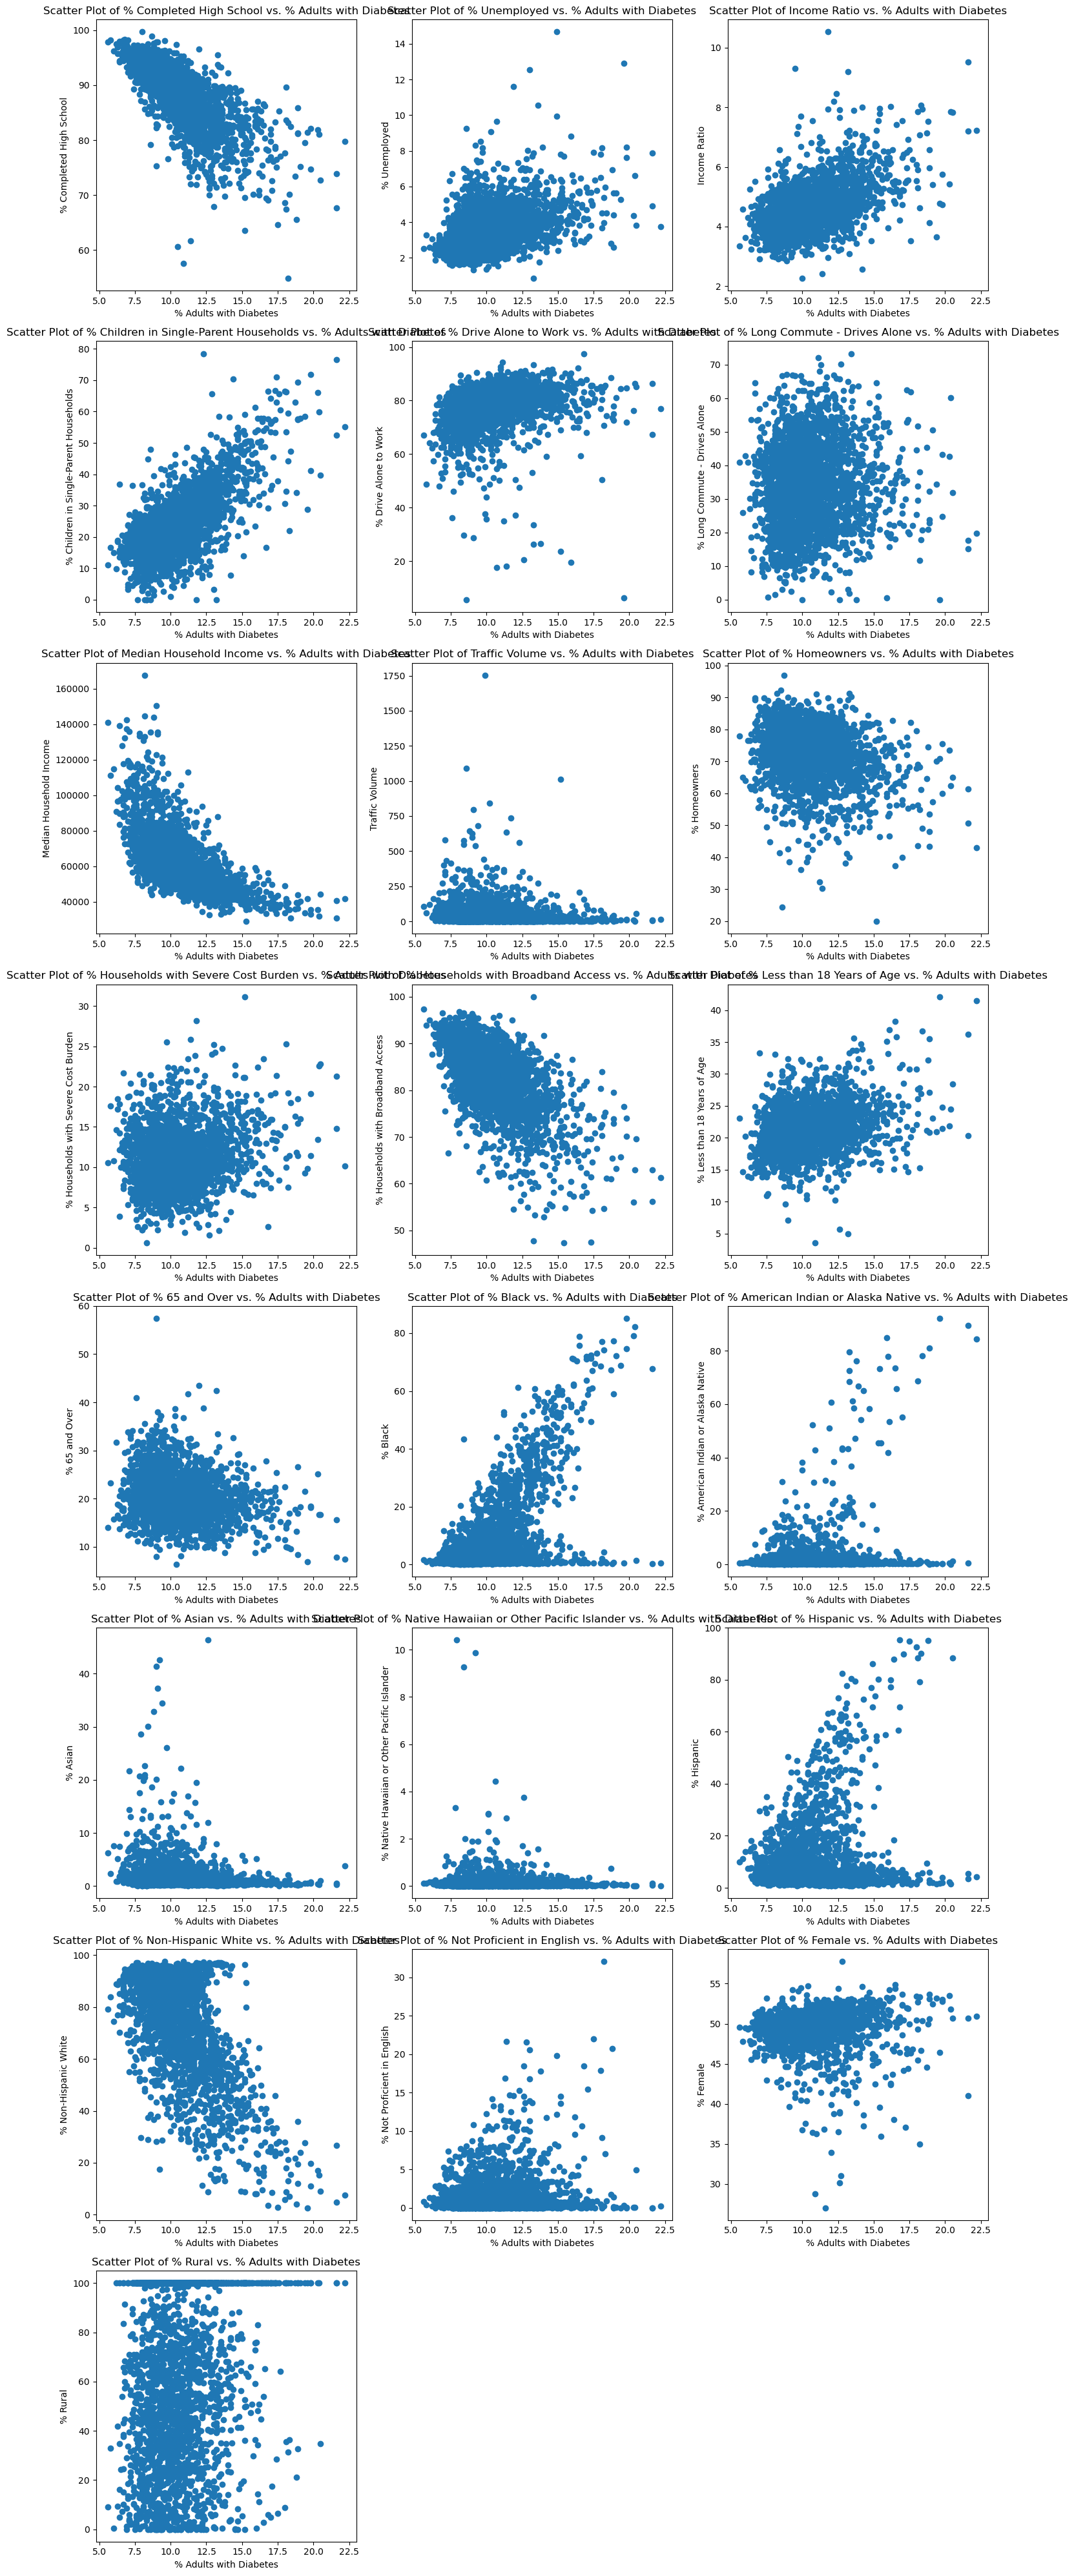

In [28]:
num_features = len(dem_features)
num_cols = 3  # Number of columns in the grid
num_rows = (num_features + num_cols - 1) // num_cols  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten() 

# Loop through the features and create scatter plots
for ax, feature in zip(axes, dem_features):
    ax.scatter(data_train[target], data_train[feature])
    ax.set_xlabel(target)
    ax.set_ylabel(feature)
    ax.set_title(f'Scatter Plot of {feature} vs. % Adults with Diabetes')

for i in range(len(dem_features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


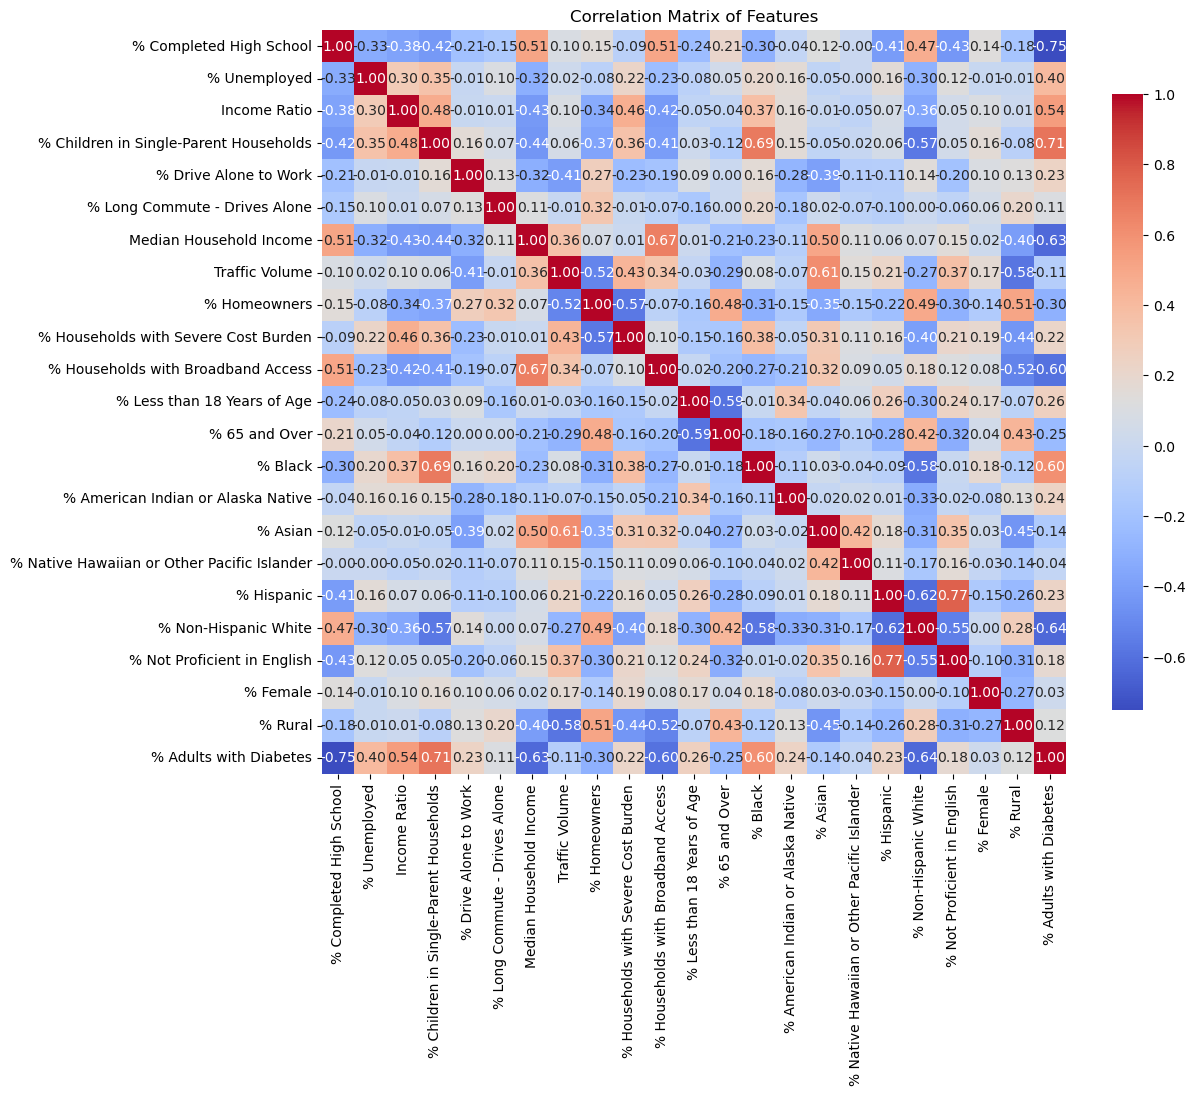

In [29]:
# Correlation matrix
correlation_matrix = data_train[dem_features + [target]].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Features')
plt.show()

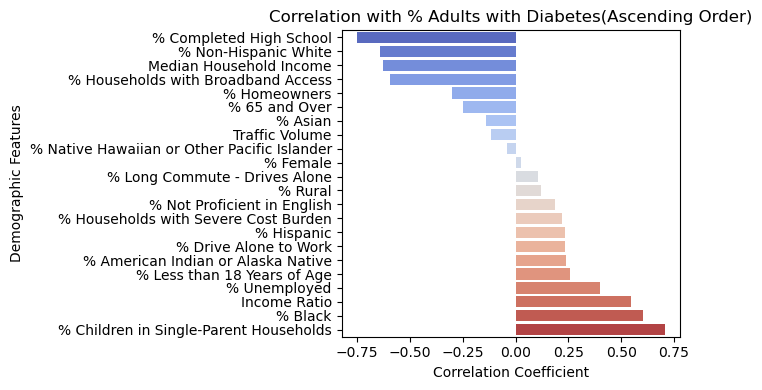

In [30]:
# Calculate the correlation matrix
correlation_matrix = data_train[dem_features + [target]].corr()

# Extract the correlations with the target variable
target_correlation = correlation_matrix[target].drop(target)

# Make barplot
plt.figure(figsize=(7, 4))
sorted_correlations = target_correlation.sort_values() # Sort the target correlations in ascending order
sns.barplot(x=sorted_correlations.values, y=sorted_correlations.index, palette='coolwarm', hue=target_correlation.index,legend=False)

plt.title('Correlation with ' + target + '(Ascending Order)')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Demographic Features')

plt.tight_layout()
plt.show()


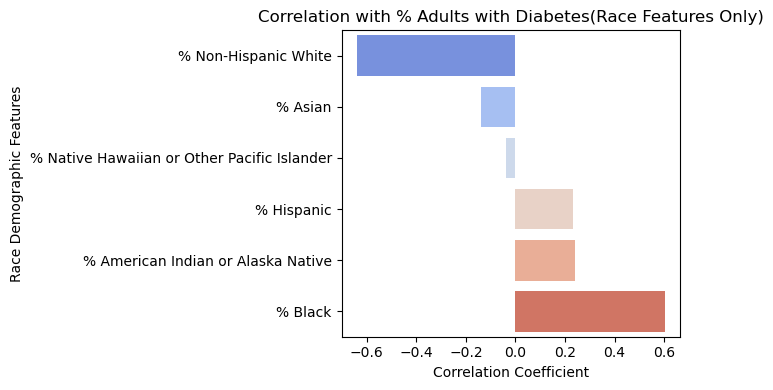

In [31]:
# Look at race/etnicity-features only
race_features = [
    '% Black',
    '% American Indian or Alaska Native',
    '% Asian',
    '% Native Hawaiian or Other Pacific Islander',
    '% Hispanic',
    '% Non-Hispanic White'
]

correlation_matrix = data_train[race_features + [target]].corr()
target_correlation_race = correlation_matrix[target].drop(target)
sorted_correlations_race = target_correlation_race.sort_values()

plt.figure(figsize=(7, 4))
sns.barplot(x=sorted_correlations_race.values, y=sorted_correlations_race.index, palette='coolwarm', hue=target_correlation_race.index,legend=False)

plt.title('Correlation with ' + target + '(Race Features Only)')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Race Demographic Features')

plt.tight_layout()
plt.show()
